## Cats/Dogs CNN  ##
## Constructing X and Y for Keras ##
Use validation_split to monitor validation and overfit
CPE 4903 HW Starter Jupyter File
Instructions - see the assignment in D2L


In [14]:
import numpy as np 

import os  # avoid kernal die
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt
import os, cv2, itertools # cv2 -- OpenCV
print('done')


done


In [15]:
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
import tensorflow as tf
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
print('done')

done


In [16]:
# np.savez_compressed('cats_dogs', X_train, X_test, y_train, y_test )
# X (nx x m), Y (1xm)
data = np.load('cats_equal_1.npz') # Cats = 1 output, dogs = 0
print('done')

done


In [17]:
data.files

['arr_0', 'arr_1', 'arr_2', 'arr_3']

### Your code here to extract your training and test data matrices from "data". 
### Be sure to scale your data by dividing by 255 and reshape to get proper shapes of X and Y
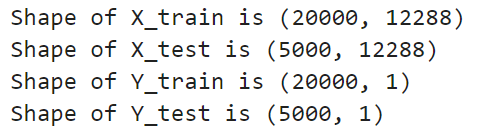


In [18]:
# Your code here
# Correct directory path
X_train = data['arr_0']
X_test = data['arr_1']
Y_train = data['arr_2']
Y_test = data['arr_3']

X_train = X_train
X_test = X_test
Y_train = Y_train.T
Y_test = Y_test.T

X_train = X_train/255
X_test = X_test/255

print(f'shape of X_train {X_train.shape}')
print(f'shape of X_test {X_test.shape}')
print(f'shape of Y_train {Y_train.shape}')
print(f'shape of Y_test {Y_test.shape}')

shape of X_train (20000, 12288)
shape of X_test (5000, 12288)
shape of Y_train (20000, 1)
shape of Y_test (5000, 1)


In [19]:
ROWS = 64
COLS = 64
CHANNELS = 3
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

In [20]:
X_train[:1].shape

(1, 12288)

In [21]:
nx = X_train.shape[1]
X_train.shape

(20000, 12288)

In [22]:
nx

12288

### Test Cases
### Run code below to see if your model can recognize cat and dog not-seen-before images

In [31]:
# Configuring X asnd Y shapes for CNN
X_train2 = X_train.reshape(X_train.shape[0], 64,64, 3)   #samples, w, h, channels
X_test2 = X_test.reshape(X_test.shape[0], 64,64,3)
Y_train2 = Y_train.reshape(-1,1)
Y_test2 = Y_test.reshape(-1,1)

print('Shape of x_train2 is {}'.format(X_train2.shape))
print('Shape of x_test2 is {}'.format(X_test2.shape))
print('Shape of y_train is {}'.format(Y_train2.shape))
print('Shape of y_test is {}'.format(Y_test2.shape))

Shape of x_train2 is (20000, 64, 64, 3)
Shape of x_test2 is (5000, 64, 64, 3)
Shape of y_train is (20000, 1)
Shape of y_test is (5000, 1)


In [36]:
model2 = Sequential()


model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))


model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))  
model2.add(Dense(1, activation='sigmoid'))  


model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model2.summary())
history2 = model2.fit(X_train2, Y_train2, epochs=10, batch_size=128, validation_data=(X_test2, Y_test2))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [37]:
# Evaluate the model on the training data using `evaluate`
print('Evaluate on train data')
Yhat = model2.predict(X_train2)
acc = np.mean(np.rint(Yhat) == Y_train2) # good trick to calculate % correct from binary output compaison
print('The train accuracy rate is: ', acc * 100)

Evaluate on train data
625/625 [==============================] - 17s 24ms/step
The train accuracy rate is:  92.735


In [38]:
# Evaluate the model on the training data using `evaluate`
print('Evaluate on test data')
Yhat_test = model2.predict(X_test2)
acc = np.mean(np.rint(Yhat_test) == Y_test2) # good trick to calculate % correct from binary output compaison
print('The test accuracy rate is: ', acc * 100)

Evaluate on test data
157/157 [==============================] - 4s 26ms/step
The test accuracy rate is:  83.96000000000001


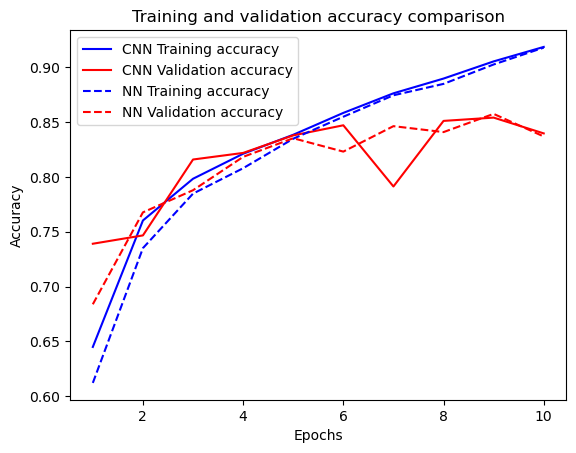

In [39]:
acc_cnn = history2.history['accuracy']
val_acc_cnn = history2.history['val_accuracy']
acc_nn = history.history['accuracy']  
val_acc_nn = history.history['val_accuracy']  

epochs = range(1, len(acc_cnn) + 1)


plt.plot(epochs, acc_cnn, 'b', label='CNN Training accuracy')
plt.plot(epochs, val_acc_cnn, 'r', label='CNN Validation accuracy')
plt.plot(epochs, acc_nn, 'b--', label='NN Training accuracy')  
plt.plot(epochs, val_acc_nn, 'r--', label='NN Validation accuracy') 
plt.title('Training and validation accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()